<a href="https://colab.research.google.com/github/evegarcianz/UK_Weather/blob/main/UK_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Liverpool Weather Visualisation

I recently moved to the UK, and coming from the north part of Mexico, which is arid, the weather was an obvious concern. Back in Mexico, I knew that British weather is way colder and more humid than the climate in my country, so I got "prepared". But watching the weather forecast on a website and experiencing it are such different things.
It was still the first my first week in Liverpool when I returned to my flat completely wet, and I realised I needed to understand, or at least try, the weather in this country. I started by visualising data.

## Data to use

Acknowledgements
For this visualisation, I will use a data set from Kaggle based on information from The Met Office, the national meteorological service for the UK. 
The curated data set UK MET Office Weather Data from JosephW20 can be found at:
https://www.kaggle.com/josephw20/uk-met-office-weather-data.

Columns:
*   year: Year in which the measurements were taken
*   month: Month in which the measurements were taken
*   tmax: Mean daily maximum temperature (°C)
*   tmin: Mean daily minimum temperature (°C)
*   af: Days of air frost recorded that month (days)
*   rain: Total rainfall (mm)
*   sun: Total sunshine duration (hours)
*   station: Station location where measurement was recorded

The original and more data  at: https://www.metoffice.gov.uk/research/climate/maps-and-data/historic-station-data.

All information regarding MET Office copyright policy can be found at: https://www.metoffice.gov.uk/about-us/legal#licences.



I will be working in Google Colab, and the repository will allocate in Github. So once the data set is in the repository, you need to clone it to start working on it.

In [2]:
!git clone https://github.com/evegarcianz/UK_Weather

Cloning into 'UK_Weather'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 1), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


### Libraries Set Up
I will use the very friendly and famous Pandas, Numpy, Matplotlib and Seaborn.

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Data Exploration and Cleaning
First, you will need a data frame; if you are still getting familiar with Colab don't forget '/content/' at the beginning of the path of your CSV file.

In [4]:
df = pd.read_csv('/content/UK_Weather/MET_Office_Weather_Data.csv')

Let's take a look at the data. 

We can see:
*   Not many columns.
*   Data since 1941.
*   And probably we are going to have a lot of missing data

In [5]:
df.head()

,year,month,tmax,tmin,af,rain,sun,station
0,1941.0,1.0,NaN,NaN,NaN,74.7,NaN,aberporth
1,1941.0,2.0,NaN,NaN,NaN,69.1,NaN,aberporth
2,1941.0,3.0,NaN,NaN,NaN,76.2,NaN,aberporth
3,1941.0,4.0,NaN,NaN,NaN,33.7,NaN,aberporth
4,1941.0,5.0,NaN,NaN,NaN,51.3,NaN,aberporth


I will check the stations present in the data.

In [6]:
df['station'].unique()

array(['aberporth', 'armagh', 'ballypatrick', 'bradford', 'braemar',
       'camborne', 'cambridge', 'cardiff', 'chivenor', 'cwmystwyth',
       'dunstaffnage', 'durham', 'eastbourne', 'eskdalemuir', 'heathrow',
       'hurn', 'lerwick', 'leuchars', 'lowestoft', 'manston', 'nairn',
       'newtonrigg', 'oxford', 'paisley', 'ringway', 'rossonwye',
       'shawbury', 'sheffield', 'southampton', 'stornoway', 'tiree',
       'valley', 'waddington', 'whitby', 'wickairport', 'yeovilton'],
      dtype=object)

I'm interested in the weather in Liverpool, and the closest stations are Sheffield and Shawbury. So I will use these for a mask and create a data frame for Liverpool

In [7]:
near_stations = (df['station'] == 'shawbury') | (df['station'] == 'sheffield')
df_liver=df[near_stations]
df_liver.head(3)


,year,month,tmax,tmin,af,rain,sun,station
25267,1946.0,1.0,NaN,NaN,NaN,58.3,37.8,shawbury
25268,1946.0,2.0,NaN,NaN,NaN,74.2,71.4,shawbury
25269,1946.0,3.0,NaN,NaN,NaN,19.8,125.0,shawbury


The older the data, the more NaN values.

In [8]:
df_liver

,year,month,tmax,tmin,af,rain,sun,station
25267,1946.0,1.0,NaN,NaN,NaN,58.3,37.8,shawbury
25268,1946.0,2.0,NaN,NaN,NaN,74.2,71.4,shawbury
25269,1946.0,3.0,NaN,NaN,NaN,19.8,125.0,shawbury
25270,1946.0,4.0,NaN,NaN,NaN,22.3,178.3,shawbury
25271,1946.0,5.0,NaN,NaN,NaN,49.6,184.2,shawbury
...,...,...,...,...,...,...,...,...
27806,2020.0,2.0,8.9,3.0,1.0,224.6,74.5,sheffield
27807,2020.0,3.0,10.6,2.8,4.0,43.6,135.6,sheffield
27808,2020.0,4.0,15.6,5.7,1.0,12.4,199.8,sheffield
27809,2020.0,5.0,18.4,7.7,1.0,5.4,251.9,sheffield



So it is good to locate the first value that is not NaN in every column.
For Shawbury station, from 1946 to 1956, we can see that we only have data for rain but not for temperature; that's why we will focus on dates from 1957 onwards. 

In [9]:
display(df_liver.loc[df_liver['tmax'].first_valid_index()],df_liver.loc[df_liver['tmin'].first_valid_index()],df_liver.loc[df_liver['rain'].first_valid_index()])


year         1957.0
month           1.0
tmax            8.6
tmin            1.6
af             11.0
rain           30.9
sun            43.4
station    shawbury
Name: 25399, dtype: object

year         1957.0
month           1.0
tmax            8.6
tmin            1.6
af             11.0
rain           30.9
sun            43.4
station    shawbury
Name: 25399, dtype: object

year         1946.0
month           1.0
tmax            NaN
tmin            NaN
af              NaN
rain           58.3
sun            37.8
station    shawbury
Name: 25267, dtype: object

However, we have to check data from the Sheffield station. And it seems that 1957 started with valid data as well.

In [10]:
df_liver[(df_liver['station']=='sheffield') & (df_liver['year']>=1957)].head(30)

,year,month,tmax,tmin,af,rain,sun,station
27049,1957.0,1.0,8.1,2.9,5.0,44.8,28.9,sheffield
27050,1957.0,2.0,8.0,2.0,4.0,78.8,75.1,sheffield
27051,1957.0,3.0,12.2,5.8,0.0,58.2,68.8,sheffield
27052,1957.0,4.0,12.3,4.8,0.0,2.2,106.9,sheffield
27053,1957.0,5.0,14.6,6.3,0.0,27.3,160.7,sheffield
27054,1957.0,6.0,20.5,10.1,0.0,31.8,275.7,sheffield
27055,1957.0,7.0,19.5,12.9,0.0,83.2,112.3,sheffield
27056,1957.0,8.0,18.2,12.0,0.0,117.2,106.3,sheffield
27057,1957.0,9.0,15.3,9.6,0.0,98.8,111.4,sheffield
27058,1957.0,10.0,14.1,7.7,0.0,41.6,80.9,sheffield


At this point, I know the data I will use comes from:
`shawbury` and `sheffield` stations
From the year 1957 to 2020
And the features I will focus on are `tmax`, `tmin` and `rain`.

In [11]:
df_liver=df_liver[(near_stations) & (df_liver['year']>=1957)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


So first, let's check `tmin`. I want to check if I can observe any changes in plotting data in intervals of two decades.
It seems like `tmin` is increasing through the decades, but at the same time, it follows the same pattern through the year.

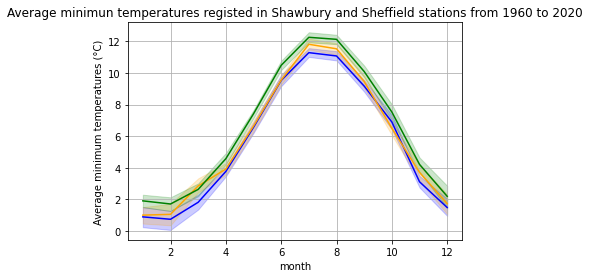

In [25]:
sns.lineplot(x=df_liver['month'],y=df_liver[(df_liver['year']>=1960) & (df_liver['year']<1980)]['tmin'],color='blue')
sns.lineplot(x=df_liver['month'],y=df_liver[(df_liver['year']>=1980) & (df_liver['year']<2000)]['tmin'],color='orange')
sns.lineplot(x=df_liver['month'],y=df_liver[(df_liver['year']>=2000) & (df_liver['year']<=2020)]['tmin'],color='green')
plt.title('Average minimun temperatures registed in Shawbury and Sheffield stations from 1960 to 2020')
plt.ylabel("Average minimum temperatures (°C)")
plt.grid()
plt.show()

Now, plotting likewise for `tmax`, the case is very similar.

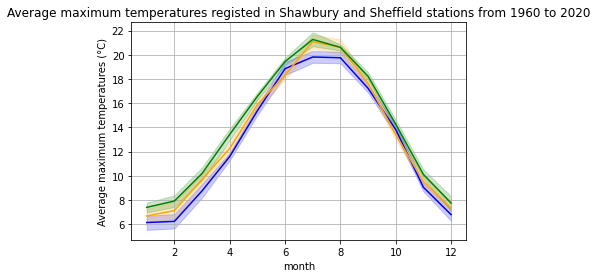

In [26]:
sns.lineplot(x=df_liver['month'],y=df_liver[(df_liver['year']>=1960) & (df_liver['year']<1980)]['tmax'],color='blue')
sns.lineplot(x=df_liver['month'],y=df_liver[(df_liver['year']>=1980) & (df_liver['year']<2000)]['tmax'],color='orange')
sns.lineplot(x=df_liver['month'],y=df_liver[(df_liver['year']>=2000) & (df_liver['year']<=2020)]['tmax'],color='green')
plt.title('Average maximum temperatures registed in Shawbury and Sheffield stations from 1960 to 2020')
plt.ylabel("Average maximum temperatures (°C)")
plt.grid()
plt.show()

Regarding the `rain`, the patterns differ when observing intervals of two decades. So I will check the last three decades separately.

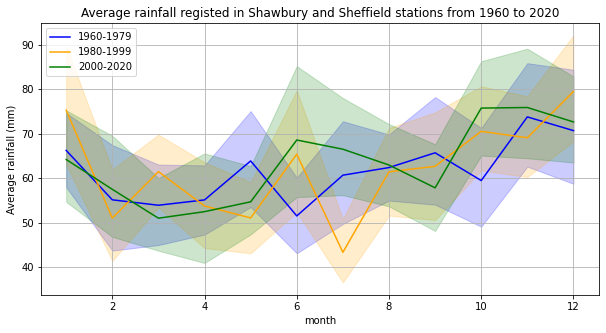

In [33]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df_liver['month'],y=df_liver[(df_liver['year']>=1960) & (df_liver['year']<1980)]['rain'],color='blue', label='1960-1979')
sns.lineplot(x=df_liver['month'],y=df_liver[(df_liver['year']>=1980) & (df_liver['year']<2000)]['rain'],color='orange',label='1980-1999')
sns.lineplot(x=df_liver['month'],y=df_liver[(df_liver['year']>=2000) & (df_liver['year']<=2020)]['rain'],color='green' ,label='2000-2020')
plt.title('Average rainfall registed in Shawbury and Sheffield stations from 1960 to 2020')
plt.ylabel("Average rainfall (mm)")
plt.legend(loc= 'upper left')
plt.grid()
plt.show()

This is the `rain` of the last three decades, but I guess I should focus on the 2010-2020 decade.

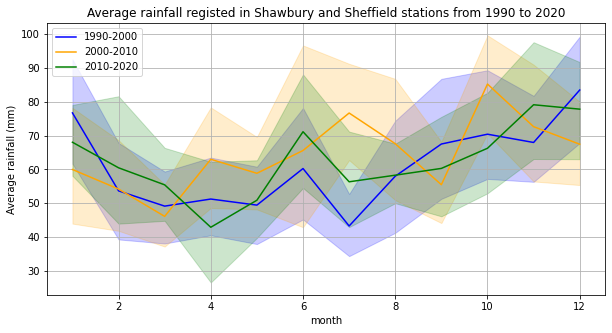

In [34]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df_liver['month'],y=df_liver[(df_liver['year']>=1990) & (df_liver['year']<2000)]['rain'],color='blue', label='1990-2000')
sns.lineplot(x=df_liver['month'],y=df_liver[(df_liver['year']>=2000) & (df_liver['year']<2010)]['rain'],color='orange', label='2000-2010')
sns.lineplot(x=df_liver['month'],y=df_liver[(df_liver['year']>=2010) & (df_liver['year']<=2020)]['rain'],color='green', label='2010-2020')
plt.title('Average rainfall registed in Shawbury and Sheffield stations from 1990 to 2020')
plt.ylabel("Average rainfall (mm)")
plt.legend(loc= 'upper left')
plt.grid()
plt.show()

Observing 2010-2020 `rain` data, I can see a pattern with two peaks in June and November. And the `rain` seems to cease a little between March and April.

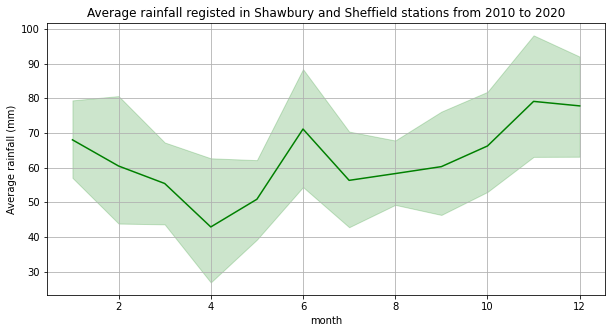

In [35]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df_liver['month'],y=df_liver[(df_liver['year']>=2010) & (df_liver['year']<=2020)]['rain'],color='green')
plt.title('Average rainfall registed in Shawbury and Sheffield stations from 2010 to 2020')
plt.ylabel("Average rainfall (mm)")
plt.grid()
plt.show()

In [17]:
last_decade=(df_liver['year']>=2010) & (df_liver['year']<=2020)

I'm curious about the most extreme months in the decade. I see freezing temperatures reaching  -5.8°C and vast rain over 220mm. 

In [49]:
min_temp= df_liver[last_decade]['tmin'].min()
max_temp= df_liver[last_decade]['tmax'].max()
min_rain= df_liver[last_decade]['rain'].min()
max_rain= df_liver[last_decade]['rain'].max()
print('For the decade 2010-2020')
print(f'The average minimum temperature in a month of the decade was {min_temp}°C, the average maximum temperature in a month was {max_temp}°C') 
print(f'Maximum rain in a month of the decade was {max_rain}mm and the mimimun in a month was {min_rain}mm ')



For the decade 2010-2020
The average minimum temperature in a month of the decade was -5.8°C, the average maximum temperature in a month was 25.4°C
Maximum rain in a month of the decade was 224.6mm and the mimimun in a month was 4.8mm 


I will check when those extreme conditions took place. And it looks like December 2010 was cold, and February 2020 was real rainy.

In [58]:
display(df_liver[last_decade].loc[df_liver[last_decade]['tmin']==min_temp],df_liver[last_decade].loc[df_liver[last_decade]['rain']==max_rain])



,year,month,tmax,tmin,af,rain,sun,station
26046,2010.0,12.0,2.0,-5.8,23.0,28.9,41.2,shawbury


,year,month,tmax,tmin,af,rain,sun,station
27806,2020.0,2.0,8.9,3.0,1.0,224.6,74.5,sheffield


Finally, I would like to check if I can see any relation between rain and temperatures. I want to choose the ideal months to plan some trips around the area, and ideal in my case is less rainy and as hot as possible. I should make some plans for July and August, from what I can see.

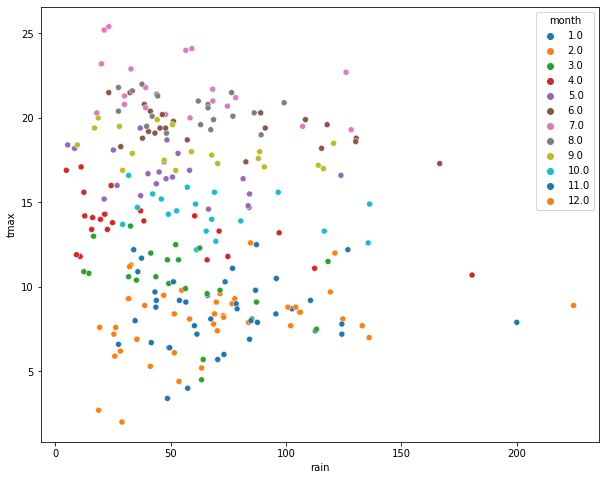

In [46]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='rain',y='tmax',hue='month',data=df_liver[last_decade],palette='tab10')
plt.show()